In [1]:
import requests
import csv #to store the data
import pandas as pd #For storing data
import matplotlib.pyplot as plt #For Visualisation
from bs4 import BeautifulSoup

# 2. Sending Request

In [2]:
response=requests.get('https://www.rottentomatoes.com/')
response.status_code # status code 200 defines Success - OK

200

In [3]:
#Creating BeautifulSoup object and parsing the table

In [4]:
soup=BeautifulSoup(response.content,'html.parser')
movie_list=soup.find('div','layout media-lists')

In [5]:
movie_list

<div class="layout media-lists">
<div class="layout__column layout__column--main">
<div class="ordered-layout__list ordered-layout__list--score" data-ad="featuredMedia" data-pagehomemanager="scoresList" hidden="">
</div>
<div class="ordered-layout__scores-wrap" data-pagehomemanager="scoresListWrapper">
<div class="ordered-layout__list ordered-layout__list--score" data-curation="rt-hp-text-list-popular-streaming-movies" data-pagehomemanager="scoresList">
<section class="dynamic-text-list">
<text-list skeleton="panel">
<h2 slot="header">Popular Streaming Movies</h2>
<a class="dynamic-text-list__see-all-link a--short" hidden="" href="https://www.rottentomatoes.com/browse/movies_at_home/sort:popular" slot="view-all">View all</a>
<div class="dynamic-text-list__streaming-links" slot="streaming-links">
<a class="p--small" href="/browse/movies_at_home/affiliates:vudu" id="vudu-affililate-link">Fandango at Home</a> |
                    <a class="p--small" href="/browse/movies_at_home/affiliate

In [6]:
movie_name=movie_list.find_all('span','dynamic-text-list__item-title')
movie_name

[<span class="dynamic-text-list__item-title">The Last Stop in Yuma County</span>,
 <span class="dynamic-text-list__item-title">Madame Web</span>,
 <span class="dynamic-text-list__item-title">War for the Planet of the Apes</span>,
 <span class="dynamic-text-list__item-title">The Idea of You</span>,
 <span class="dynamic-text-list__item-title">The Ministry of Ungentlemanly Warfare</span>,
 <span class="dynamic-text-list__item-title">Godzilla x Kong: The New Empire</span>,
 <span class="dynamic-text-list__item-title">Abigail</span>,
 <span class="dynamic-text-list__item-title">Mother of the Bride</span>,
 <span class="dynamic-text-list__item-title">Unfrosted</span>,
 <span class="dynamic-text-list__item-title">Late Night with the Devil</span>,
 <span class="dynamic-text-list__item-title">Dark Matter</span>,
 <span class="dynamic-text-list__item-title">Bodkin</span>,
 <span class="dynamic-text-list__item-title">Baby Reindeer</span>,
 <span class="dynamic-text-list__item-title">Doctor Who</

In [7]:
movie_rating=movie_list.find_all('span','b--medium')
movie_rating

[<span class="b--medium" slot="tomatometer-value">
                                 
                                     97%
                                 
                             </span>,
 <span class="b--medium" slot="tomatometer-value">
                                 
                                     11%
                                 
                             </span>,
 <span class="b--medium" slot="tomatometer-value">
                                 
                                     94%
                                 
                             </span>,
 <span class="b--medium" slot="tomatometer-value">
                                 
                                     83%
                                 
                             </span>,
 <span class="b--medium" slot="tomatometer-value">
                                 
                                     71%
                                 
                             </span>,
 <span cla

In [8]:
movie_name[1], movie_rating[1]

(<span class="dynamic-text-list__item-title">Madame Web</span>,
 <span class="b--medium" slot="tomatometer-value">
                                 
                                     11%
                                 
                             </span>)

In [9]:
L = len(movie_name)
for i in range(L):
    movie_name[i]=movie_name[i].string
    movie_rating[i]=movie_rating[i].string

In [10]:
movie_name[1]

'Madame Web'

In [11]:
movie_rating[1]

'\n                                \n                                    11%\n                                \n                            '

In [12]:
for i in range(L):
    movie_rating[i]=str.strip(movie_rating[i])
movie_rating 

['97%',
 '11%',
 '94%',
 '83%',
 '71%',
 '54%',
 '83%',
 '13%',
 '42%',
 '97%',
 '77%',
 '70%',
 '98%',
 '94%',
 '93%',
 '42%',
 '83%',
 '100%',
 '50%',
 '87%',
 '97%',
 '100%',
 '80%',
 '60%',
 '- -',
 '96%',
 '- -',
 '- -',
 '- -',
 '- -']

# 6. Cleaning the data 

In [13]:
for i in range(L):
    if movie_rating[i] == '- -':
        movie_rating[i] = None
    else:
        movie_rating[i] = int(movie_rating[i][:-1])
movie_rating
        
    

[97,
 11,
 94,
 83,
 71,
 54,
 83,
 13,
 42,
 97,
 77,
 70,
 98,
 94,
 93,
 42,
 83,
 100,
 50,
 87,
 97,
 100,
 80,
 60,
 None,
 96,
 None,
 None,
 None,
 None]

# 7. Storing the data

In [15]:
#Here we are going to store the data into a csv file
#Creating a DataFrame to store
movie=pd.DataFrame({'Name':movie_name,'Ratings':movie_rating})
movie.head()
movie.tail()

,Name,Ratings
25,Bridgerton,96.0
26,The Big Cigar,NaN
27,The Tonight Show Starring Jimmy Fallon,NaN
28,Harry Wild,NaN
29,RuPaul's Drag Race: All Stars,NaN


In [16]:
movie.Ratings = movie.Ratings.fillna(movie.Ratings.mean())

In [17]:
movie.tail()

,Name,Ratings
25,Bridgerton,96.00
26,The Big Cigar,74.88
27,The Tonight Show Starring Jimmy Fallon,74.88
28,Harry Wild,74.88
29,RuPaul's Drag Race: All Stars,74.88


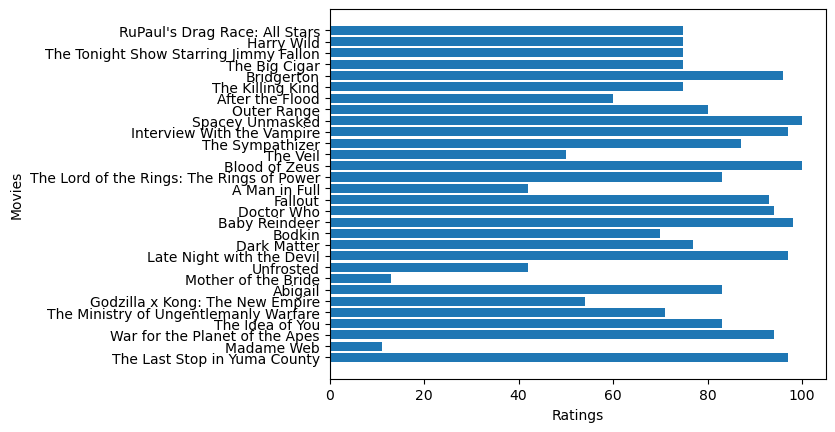

In [18]:
#Number of Reviews of movies released in 2018
plt.barh(movie.Name,movie.Ratings)
plt.xlabel('Ratings')
plt.ylabel('Movies',rotation=90)
plt.show()